# COMP5310 Principle of data science
## Assignment - Stage 1 and 2

Student Name – Shashwati Dutta
<br>
Student ID – 500693287
<br>
Unikey – sdut7674

This project aims to use the Cleveland data and understand the following:
 - Compare multiple classification techniques and identify the best classifier to predict effectively if a person is suffering from heart disease or not suffering from heart disease at all
 - Though the Cleveland database is mostly used widely by ML researchers, with availability of multiple data of exact similar structure, it would be interesting to know if the classifier identified in section a, could perform similar task with similar accuracy on other datasets.

#### Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 
<br>
Location: https://archive.ics.uci.edu/ml/datasets/heart+disease

#### Attribute Information:

###### 14 attributes used:
 - age: Age
 - sex: Sex
 - cp: Chest pain type
 - trestbps: Resting blood pressure
 - chol: serum cholesterol
 - fbs: fasting blood sugar
 - restecg: resting ECG
 - restecg: maximum heart rate achieved
 - exang: exercise induced angina
 - oldpeak: ST depression induced by exercise relative to rest
 - slope: peak exercise ST segment
 - ca: Number of major vessels coloured by fluoroscopy
 - thal: thalassemia
 - num: Diagnosis of heart disease (Class Variable)

# Libraries

In [700]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import StratifiedKFold 
from matplotlib import pyplot

from sklearn.metrics import plot_confusion_matrix
from pandas.plotting import scatter_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats


# Cleveland data preprocessing and visualization

### Loading the data and data snippet

In [701]:
# Loading the data

c_data = pd.read_excel('processed.cleveland.xlsx',header = None)
c_data.columns = ['Age','Sex','cp','tretbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [702]:
#Data Snippet
c_data.head()

,Age,Sex,cp,tretbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [703]:
# Data Dimension
c_data.shape

(303, 14)

### Missing value treatment

In [704]:
# Replacing '?' in data with nan
v = float('NaN')
c_data = c_data.replace(to_replace ="?", value = v) 

In [705]:
# Missing value summary
c_data.isnull().sum()

Age        0
Sex        0
cp         0
tretbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

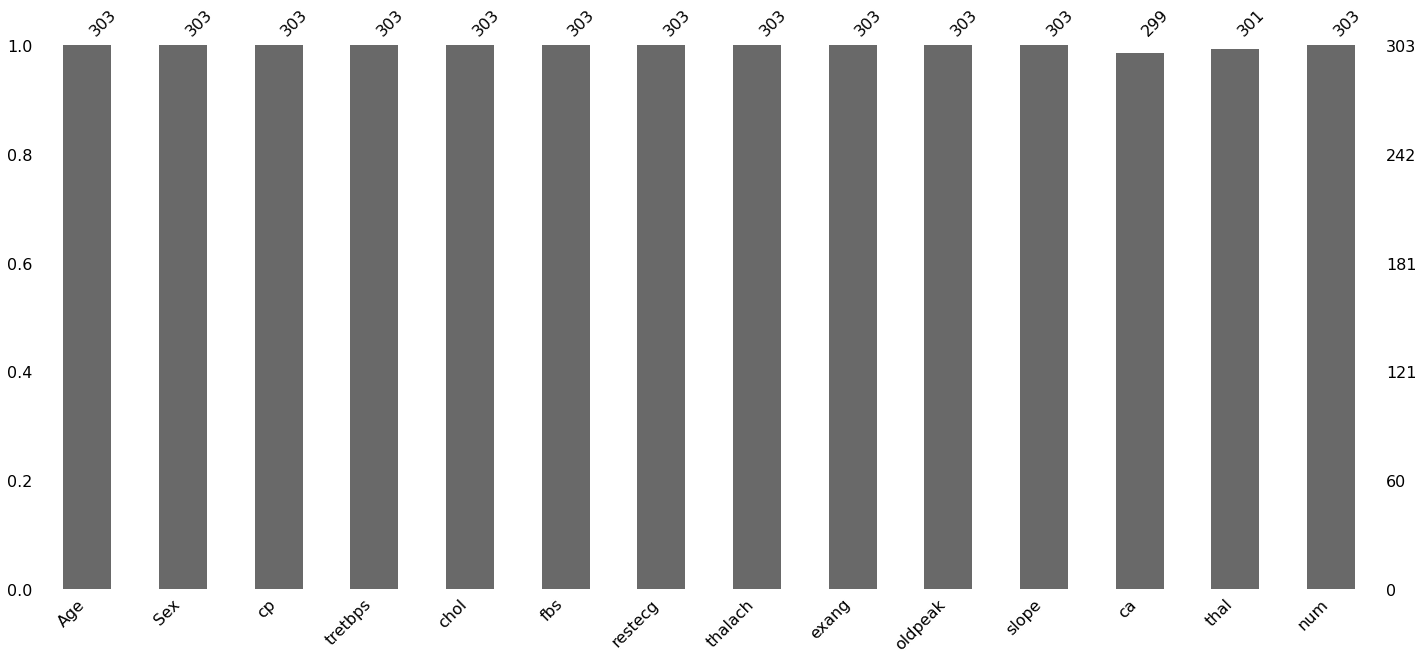

In [706]:

msno.bar(c_data)

Proportion of missing value is very low. We can drop the rows with missing values all together

In [707]:
c_data = c_data.dropna()
c_data.shape

(297, 14)

### Data Visualization
Response: 'num': 5 classes - 0, 1, 2, 3, 4

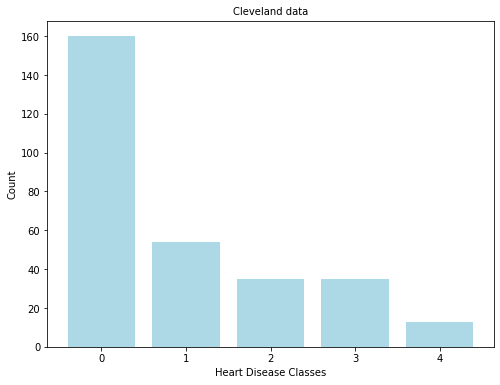

0    160
1     54
3     35
2     35
4     13
Name: num, dtype: int64

In [708]:
## Reference: https://datatofish.com/plot-histogram-python/

res = c_data.num

def bar_plot(column_key, title, xlabel):
    res_l = column_key.values.tolist()
    cnt = Counter()
    for c in res_l:
        cnt[c] += 1
    keys = cnt.keys()
    values = cnt.values() 
    plt.subplots(figsize=(8,6))
    plt.bar(keys, values,color = "lightblue") 
    #plt.gca().invert_yaxis()
    plt.title(title, fontsize=10)
    plt.xlabel(xlabel, fontsize=10) 
    plt.ylabel("Count", fontsize=10) 
    plt.xticks(fontsize= 10) 
    plt.show()
    
bar_plot(c_data.num, "Cleveland data", "Heart Disease Classes")
c_data.num.value_counts()

###### Distribution of the classes by age and gender

Text(0, 0.5, 'Response Classes')

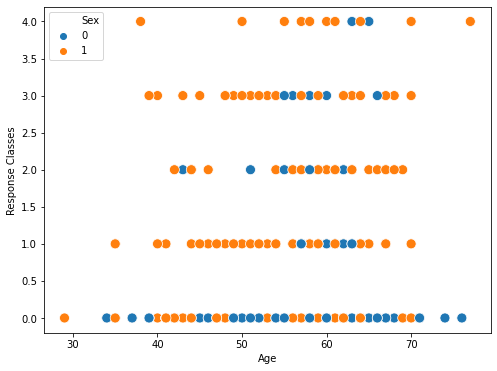

In [709]:

plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Age", y = "num", hue= "Sex", data=c_data, s = 100)
plt.xlabel('Age')
plt.ylabel('Response Classes')

## Hungarian data preprocessing

### Loading the data and data snippet

In [710]:
h_data = pd.read_excel('reprocessed.hungarian.xlsx',header = None)
h_data.columns = ['Age','Sex','cp','tretbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


In [711]:
#Data Snippet
h_data.head()

,Age,Sex,cp,tretbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,?,?,?,0
1,49,0,3,160,180,0,0,156,0,1.0,2,?,?,1
2,37,1,2,130,283,0,1,98,0,0.0,?,?,?,0
3,48,0,4,138,214,0,0,108,1,1.5,2,?,?,3
4,54,1,3,150,?,0,0,122,0,0.0,?,?,?,0


In [712]:
# Data Dimension
h_data.shape

(294, 14)

### Missing value treatment

In [713]:
# Replacing '?' in data with nan
v = float('NaN')
h_data = h_data.replace(to_replace ="?", value = v) 
# Missing value summary
h_data.isnull().sum()

Age          0
Sex          0
cp           0
tretbps      1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
slope      190
ca         290
thal       266
num          0
dtype: int64

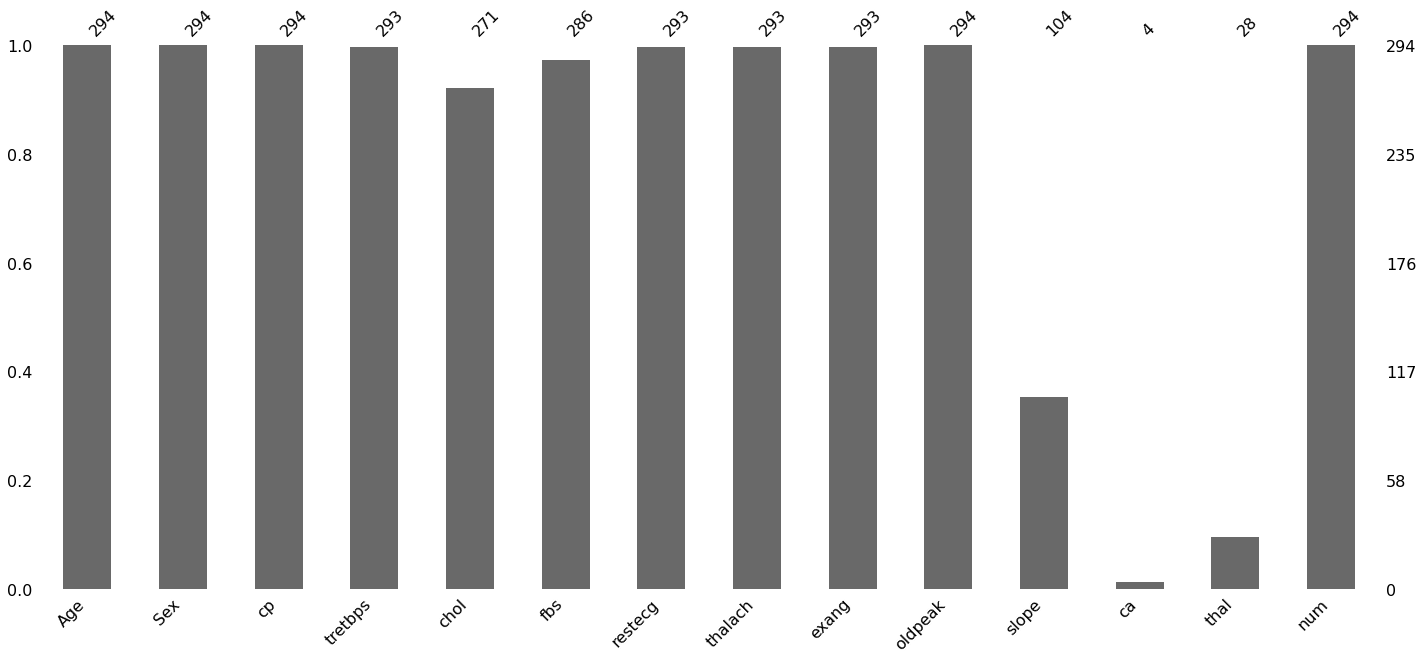

In [714]:
msno.bar(h_data)

###### Unlike Cleveland data, missing cases proportion in Hungarian data (with 294 instances) is very high, so discarding those instances would lead to major information loss. Missing cases for serum cholesterol level is comparatively low, we can use the mean imputation approach to impute missing value. In case of peak exercise ST segment, Number of major vessels coloured by fluoroscopy and thalassemia, computing means with such small amount of data to represent entire variable would not detect the true picture. We will need to replace missing with 0 for these variables in the comparison analysis.

#### Missing Value Imputation

In [715]:
mean_chol = h_data['chol'].mean()
mean_chol

250.84870848708488

In [716]:
h_data = h_data.fillna(value = {'chol':mean_chol,
                               'slope':0,
                               'ca':0,
                               'thal':0})

h_data

,Age,Sex,cp,tretbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140.0,289.000000,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,0
1,49,0,3,160.0,180.000000,0.0,0.0,156.0,0.0,1.0,2.0,0.0,0.0,1
2,37,1,2,130.0,283.000000,0.0,1.0,98.0,0.0,0.0,0.0,0.0,0.0,0
3,48,0,4,138.0,214.000000,0.0,0.0,108.0,1.0,1.5,2.0,0.0,0.0,3
4,54,1,3,150.0,250.848708,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,NaN,308.000000,0.0,1.0,NaN,NaN,2.0,1.0,0.0,0.0,0
290,36,1,2,120.0,166.000000,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0
291,48,1,3,110.0,211.000000,0.0,0.0,138.0,0.0,0.0,0.0,0.0,6.0,0
292,47,0,2,140.0,257.000000,0.0,0.0,135.0,0.0,1.0,1.0,0.0,0.0,0


In [717]:
h_data = h_data.dropna()
h_data.shape

(284, 14)

## Switzerland data preprocessing

### Loading the data and data snippet

In [718]:
s_data = pd.read_excel('processed.switzerland.xlsx',header = None)
s_data.columns = ['Age','Sex','cp','tretbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [719]:
#Data Snippet
s_data.head()

,Age,Sex,cp,tretbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,0.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,0.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [720]:
# Data Dimension
s_data.shape

(123, 14)

In [721]:
# Replacing '?' in data with nan
v = float('NaN')
s_data = s_data.replace(to_replace ="?", value = v) 
# Missing value summary
s_data.isnull().sum()

Age          0
Sex          0
cp           0
tretbps      2
chol         0
fbs         75
restecg      1
thalach      1
exang        1
oldpeak      6
slope       17
ca         118
thal        52
num          0
dtype: int64

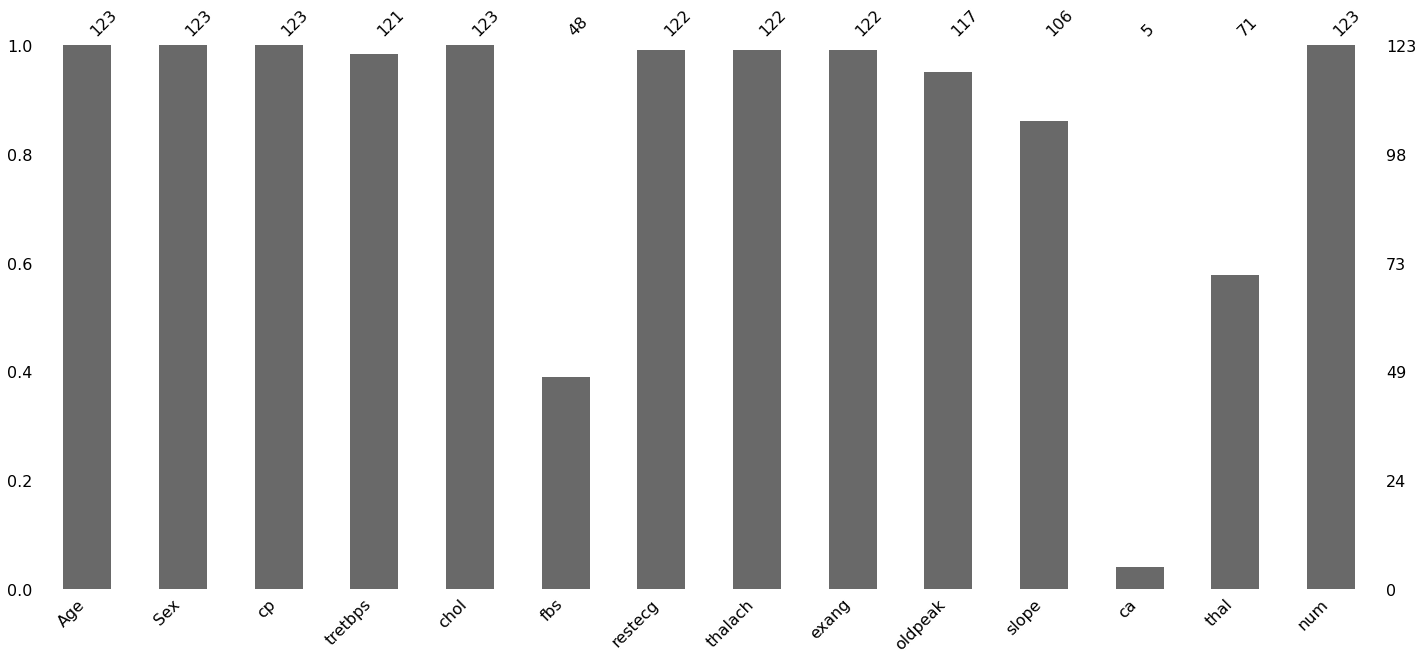

In [722]:
msno.bar(s_data)

###### Similar to Hungarian data, missing cases proportion is also high in Switzerland data (with 123 instances). In this data we have 75 missing cases for fasting blood sugar level, 118 and 52 cases for Number of major vessels coloured by fluoroscopy and thalassemia respectively. For rest of the variable the missing case proportion is quite low and should be replaced with 0. 

##### Missing Treatment

In [723]:
mean_slope = h_data['slope'].mean()
mean_thal = h_data['thal'].mean()

s_data = s_data.fillna(value = {'slope':mean_slope,
                               'thal':mean_thal,
                               'ca':0,
                               'fbs':0})

s_data = s_data.dropna()
s_data.shape

(116, 14)

## Long-beach VA data preprocessing and visualization

### Loading the data and data snippet

In [724]:
v_data = pd.read_excel('processed.va.xlsx',header = None)
v_data.columns = ['Age','Sex','cp','tretbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [725]:
#Data Snippet
v_data.head()

,Age,Sex,cp,tretbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [726]:
# Data Dimension
v_data.shape

(200, 14)

In [727]:
# Replacing '?' in data with nan
v = float('NaN')
v_data = v_data.replace(to_replace ="?", value = v) 
# Missing value summary
v_data.isnull().sum()

Age          0
Sex          0
cp           0
tretbps     56
chol         7
fbs          7
restecg      0
thalach     53
exang       53
oldpeak     56
slope      102
ca         198
thal       166
num          0
dtype: int64

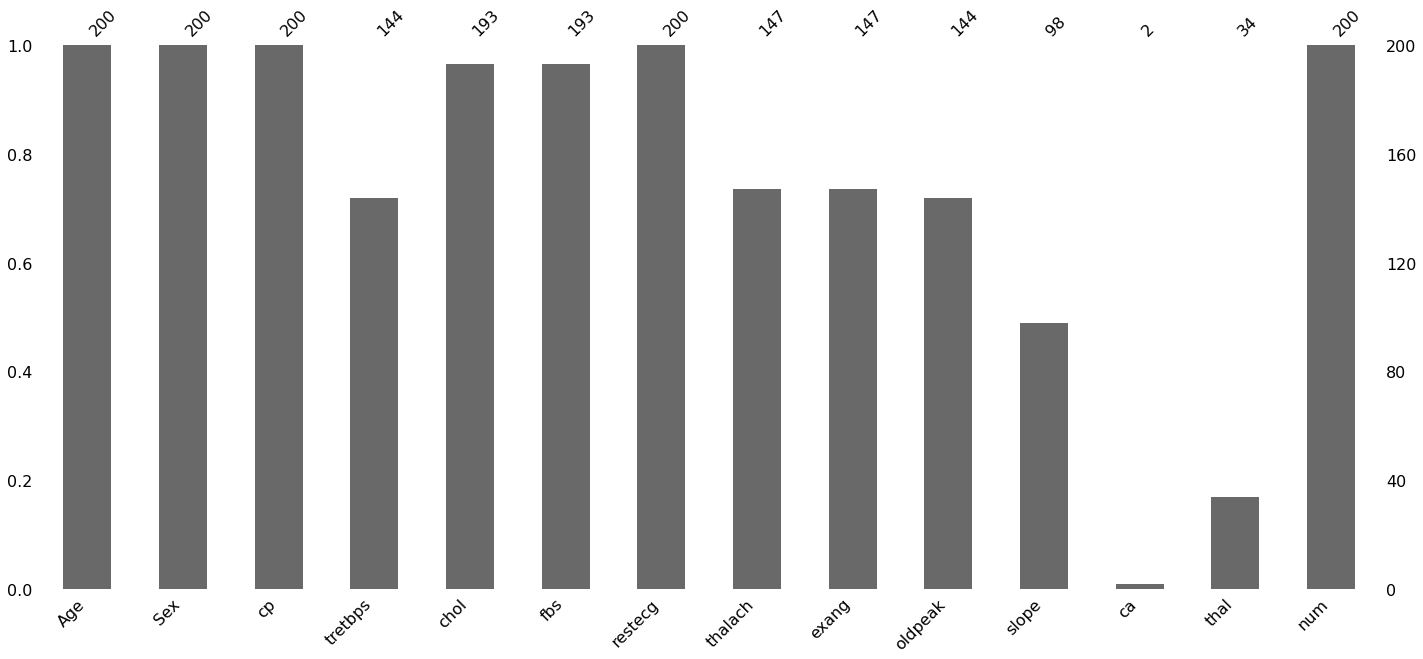

In [728]:
msno.bar(v_data)

###### Similar to other secondary datasets we see many missing cases in Long-beach VA data (with 200 instances) as well. For resting blood pressure, max heart rate achieved, and exercise induced angina mean imputation method can be used whereas similar to the Hungarian data, missing value for peak exercise ST segment, Number of major vessels coloured by fluoroscopy and thalassemia will be replcaed with 0

##### Missing Treatment

In [729]:
mean_tretbps = v_data['tretbps'].mean()
mean_thalach = v_data['thalach'].mean()
mean_exang = v_data['exang'].mean()
mean_oldpeak = v_data['oldpeak'].mean()

v_data = v_data.fillna(value = {'tretbps':mean_slope,
                                'thalach':mean_thalach,
                                'exang': mean_tretbps,
                                'oldpeak':mean_oldpeak,
                                'slope':0,
                                'ca':0,
                                'thal':0})


v_data = v_data.dropna()
v_data.shape

(186, 14)

## Heart disease vs no heart disease

0    160
1    137
Name: num, dtype: int64

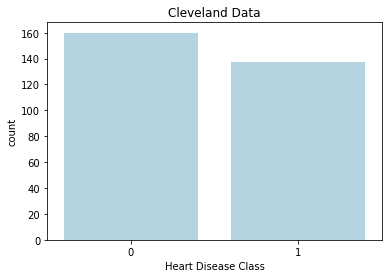

In [730]:
c_data.num = pd.Series(np.where(c_data.num.values == 0, 0, 1),
          c_data.index)

c_data_plot = c_data.rename(columns={"num": "Class"}, errors="raise")
ax = sns.countplot(x="Class", data=c_data_plot, color = "lightblue")
plt.title("Cleveland Data")
plt.xlabel("Heart Disease Class")
    
c_data.num.value_counts()

In [731]:

categorical_val = []
continous_val = []
for column in c_data.columns:
    if len(c_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

# Data summary plot

Text(0.5, 0.98, 'Scatter plot of continuous variable')

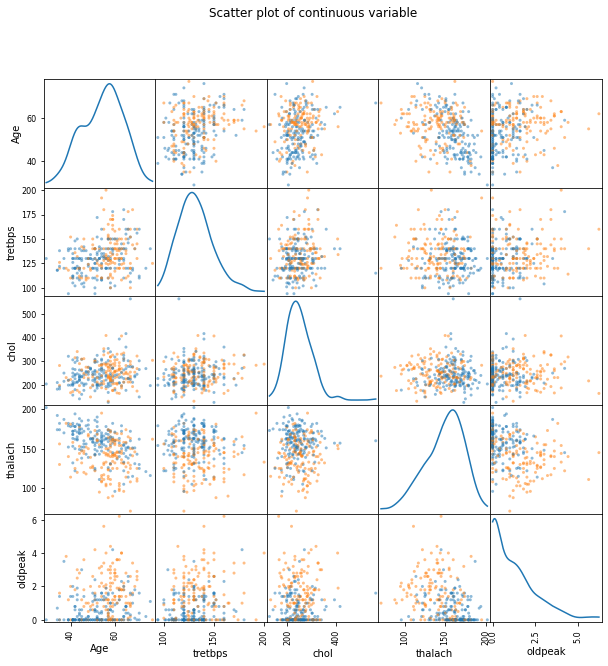

In [732]:
#c_data_plot = c_data.drop('num', axis=1)

color_wheel = {0: sns.color_palette("tab10")[0], 
               1: sns.color_palette("tab10")[1]}
colors = c_data["num"].map(lambda x: color_wheel.get(x))
#colors

scatter_matrix(c_data[continous_val], figsize=(10, 10), diagonal='kde', color=colors)
plt.suptitle("Scatter plot of continuous variable")

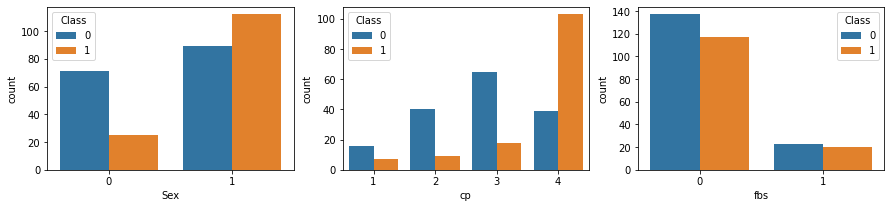

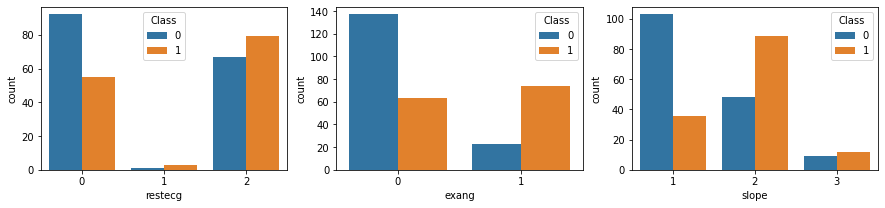

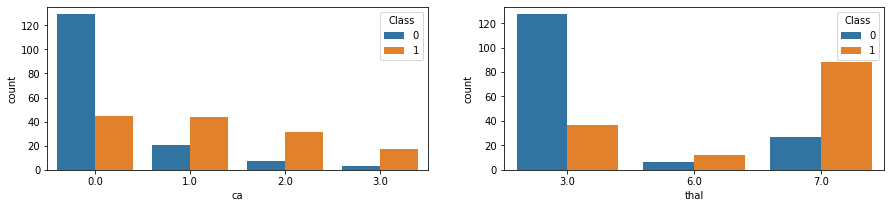

In [733]:
c_data_toplot = c_data.rename(columns={"num": "Class"})

#plt.subplots(figsize=(7, 3))
fig, ax =plt.subplots(1,3, figsize=(15, 3))
sns.countplot(c_data[categorical_val[0]], hue=c_data_toplot.Class, ax=ax[0])
sns.countplot(c_data[categorical_val[1]], hue=c_data_toplot.Class, ax=ax[1])
sns.countplot(c_data[categorical_val[2]], hue=c_data_toplot.Class, ax=ax[2])

fig, ax =plt.subplots(1,3, figsize=(15, 3))
sns.countplot(c_data[categorical_val[3]], hue=c_data_toplot.Class, ax=ax[0])
sns.countplot(c_data[categorical_val[4]], hue=c_data_toplot.Class, ax=ax[1])
sns.countplot(c_data[categorical_val[5]], hue=c_data_toplot.Class, ax=ax[2])

fig, ax =plt.subplots(1,2, figsize=(15, 3))
sns.countplot(c_data[categorical_val[6]], hue=c_data_toplot.Class, ax=ax[0])
sns.countplot(c_data[categorical_val[7]], hue=c_data_toplot.Class, ax=ax[1])
#sns.countplot(c_data[categorical_val[8]], hue=c_data.num, ax=ax[2])

# Correlation Matrix

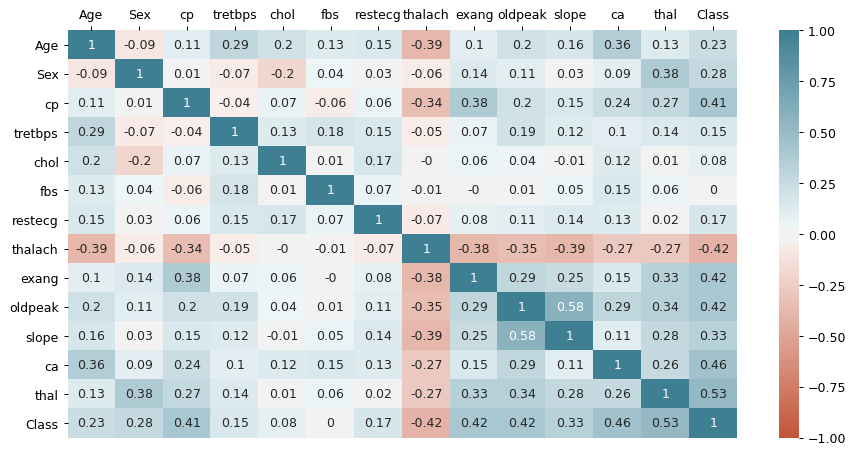

In [734]:
corr = c_data_plot.corr()
#lower = np.tril(corr) # take upper correlation matrix
fig = plt.subplots(figsize=(12, 6), dpi=90)    
ax = sns.heatmap(
    round(corr,2), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='center'
);
ax.xaxis.set_ticks_position('top')
plt.show()

## Train/test/validation testing

In [735]:


## Splitting data set into training set and test set
train1, test = train_test_split(c_data, test_size=0.20, random_state=1)

## Splitting training set into training and validation for plotting train error and test error
train, validation = train_test_split(train1, test_size=0.26, random_state=1)

X_train_full = train1.drop(columns=['num'])
y_train_full = train1['num']

X_train = train.drop(columns=['num'])
y_train = train['num']

X_val = validation.drop(columns=['num'])
y_val = validation['num']

X_test = test.drop(columns=['num'])
y_test = test['num']

print(f"X_full train shape: {X_train_full.shape}"),
print(f"X_train shape: {X_train.shape}"),
print(f"X_test shape: {X_test.shape}")
print(f"X_val shape: {X_val.shape}")

print(f"y_full train shape: {y_train_full.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_val shape: {y_val.shape}")

X_full train shape: (237, 13)
X_train shape: (175, 13)
X_test shape: (60, 13)
X_val shape: (62, 13)
y_full train shape: (237,)
y_train shape: (175,)
y_test shape: (60,)
y_val shape: (62,)


In [736]:

X_train_full_scl = X_train_full.copy()
X_train_scl = X_train.copy()
X_val_scl = X_val.copy()
X_test_scl = X_test.copy()


In [737]:

sc = StandardScaler()
X_train_full_scl[continous_val] = sc.fit_transform(X_train_full[continous_val])
X_test_scl[continous_val] = sc.transform (X_test[continous_val])

X_train_scl[continous_val] = sc.fit_transform(X_train[continous_val])
X_val_scl[continous_val] = sc.transform (X_val[continous_val])



# Feature Importance

Feature: 0, Score: -0.04410
Feature: 1, Score: 0.79182
Feature: 2, Score: 0.22029
Feature: 3, Score: 0.01253
Feature: 4, Score: 0.00601
Feature: 5, Score: -0.62506
Feature: 6, Score: 0.28237
Feature: 7, Score: -0.03532
Feature: 8, Score: 0.47844
Feature: 9, Score: 0.52107
Feature: 10, Score: -0.00990
Feature: 11, Score: 1.22203
Feature: 12, Score: 0.36657


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


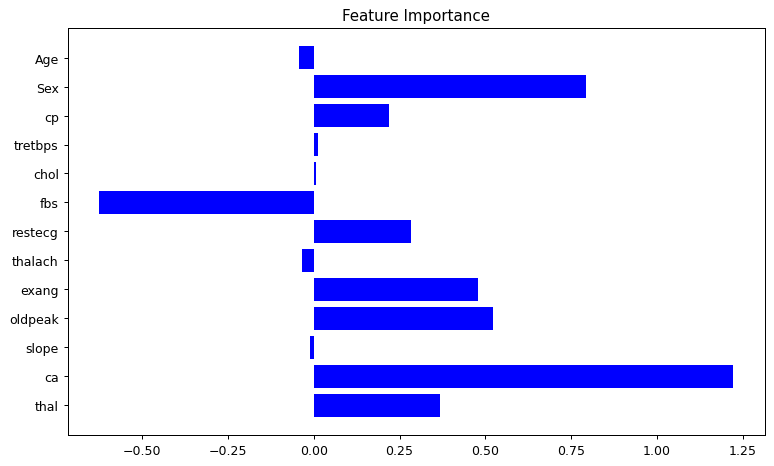

In [738]:
model = LogisticRegression()
model.fit(X_train_full, y_train_full)
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
fig = plt.subplots(figsize=(10, 6), dpi=90)    
plt.barh([x for x in range(len(importance))], importance, color = "blue")
plt.gca().invert_yaxis()
plt.yticks(np.arange(13), X_train_full_scl.columns)
plt.title("Feature Importance")
plt.show()

In [739]:
X_train_full_scl = X_train_full_scl.drop(columns=['fbs'])
X_train_scl = X_train_scl.drop(columns=['fbs'])
X_val_scl = X_val_scl.drop(columns=['fbs'])
X_test_scl = X_test_scl.drop(columns=['fbs'])

# KNN

##### Initial Model with default parameters

In [740]:
knn = KNeighborsClassifier()
knn.fit(X_train_full_scl, y_train_full)
y_pred1 = knn.predict(X_test_scl)
f1_knn_benchmark = f1_score(y_test, y_pred1, average="macro")

acc_knn_benchmark = np.mean(y_pred1 == y_test)
print("Accuracy Benchmark: " ,round(acc_knn_benchmark*100,2), "%")
print("F1 Score Benchmark: " ,round(f1_knn_benchmark*100,2),"%")

Accuracy Benchmark:  80.0 %
F1 Score Benchmark:  79.8 %


##### Tuning Hyper-parameters

Optimal number of Neighbors : 9


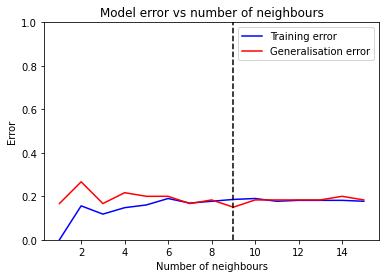

In [741]:
#### Tuning k ####
n_neighbor = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
clf = KNeighborsClassifier()
train_errors = list()
test_errors = list()
for n_neighbors in n_neighbor:
    clf.set_params(n_neighbors=n_neighbors)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_k_optim = np.argmin(test_errors)
k_optim = n_neighbor[i_k_optim]
print("Optimal number of Neighbors : %s" % k_optim)

plt.plot(n_neighbor, train_errors, c='b', label='Training error')
plt.plot(n_neighbor, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Number of neighbours')
plt.title('Model error vs number of neighbours')
plt.axvline(x=k_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal leaf size : 30


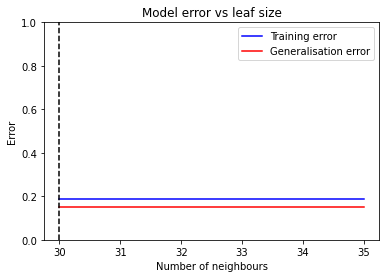

In [742]:
#### Tuning Leaf size ####


leaf_sizes = [30,35]
clf = KNeighborsClassifier(n_neighbors=9)
train_errors = list()
test_errors = list()
for leaf_size in leaf_sizes:
    clf.set_params(leaf_size = leaf_size)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_leaf_size_optim = np.argmin(test_errors)
leaf_size_optim = leaf_sizes[i_leaf_size_optim]
print("Optimal leaf size : %s" % leaf_size_optim)

plt.plot(leaf_sizes, train_errors, c='b', label='Training error')
plt.plot(leaf_sizes, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Number of neighbours')
plt.title('Model error vs leaf size')
plt.axvline(x=leaf_size_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal power parameter : 1


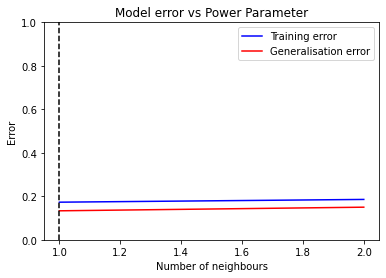

In [743]:
#### Tuning power parameter ####


ps = [1,2]
clf = KNeighborsClassifier(n_neighbors=9)
train_errors = list()
test_errors = list()
for p in ps:
    clf.set_params(p = p)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_p_optim = np.argmin(test_errors)
p_optim = ps[i_p_optim]
print("Optimal power parameter : %s" % p_optim)

plt.plot(ps, train_errors, c='b', label='Training error')
plt.plot(ps, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Number of neighbours')
plt.title('Model error vs Power Parameter')
plt.axvline(x=p_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

In [744]:
knn_final = KNeighborsClassifier(n_neighbors = k_optim)
knn_final.fit(X_train_full_scl, y_train_full)
y_pred1 = knn_final.predict(X_test_scl)


f1_knn_final = f1_score(y_test, y_pred1, average="macro")

acc_knn_final = np.mean(y_pred1 == y_test)
print("Accuracy Final: " ,round(acc_knn_final*100,2), "%")
print("F1 Score Final: " ,round(f1_knn_final*100,2),"%")


Accuracy Final:  85.0 %
F1 Score Final:  84.9 %


In [745]:
def result(classifier, X_test, y_test, predicted):
    
    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test, predicted, zero_division = 1)
    print('Classification report : \n',matrix)

    disp = plot_confusion_matrix(classifier,X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title("Confusion Matrix")
    plt.show()

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



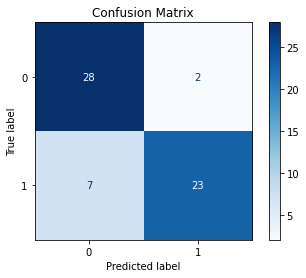

In [746]:
predicted = knn_final.predict(X_test_scl)
result(knn_final, X_test_scl, np.asarray(y_test),predicted)


##### Stratified cross validation

In [747]:
X = np.asarray(X_train_full_scl)
y = np.asarray(y_train_full)

# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
knn_accu_stratified = [] 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn_final.fit(x_train_fold, y_train_fold) 
    knn_accu_stratified.append(knn_final.score(x_test_fold, y_test_fold)) 

print('Maximum:',max(knn_accu_stratified))
print('Minimum:',min(knn_accu_stratified))
print('Mean:',np.mean(knn_accu_stratified))


Maximum: 0.9166666666666666
Minimum: 0.6521739130434783
Mean: 0.7929347826086957


##### ROC

In [748]:
knn_probs = knn_final.predict_proba(X_test_scl)
knn_probs = knn_probs[:, 1]  # keep probabilities for the positive outcome only
knn_auc = roc_auc_score(y_test, knn_probs) # calculate scores
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# SVM

In [752]:
svmmod = svm.SVC(random_state = 1)
svmmod.fit(X_train_full_scl, y_train_full)
y_pred1 = svmmod.predict(X_test_scl)
f1_svm_benchmark = f1_score(y_test, y_pred1, average="macro")

acc_svm_benchmark = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_svm_benchmark*100,2), "%")
print("F1 Score: " ,round(f1_svm_benchmark*100,2),"%")



Accuracy:  85.0 %
F1 Score:  84.9 %


##### Tuning Hyper-parameters

Optimal kernel : linear


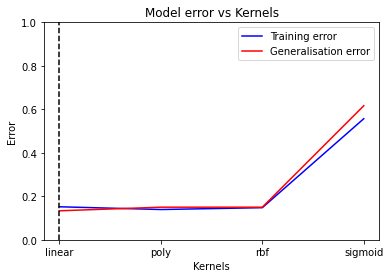

In [753]:
#### Tuning kernels ####


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
clf = svm.SVC()
train_errors = list()
test_errors = list()
for kernel in kernels:
    clf.set_params(kernel = kernel)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_kernel_optim = np.argmin(test_errors)
kernel_optim = kernels[i_kernel_optim]
print("Optimal kernel : %s" % kernel_optim)

plt.plot(kernels, train_errors, c='b', label='Training error')
plt.plot(kernels, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Kernels')
plt.title('Model error vs Kernels')
plt.axvline(x=kernel_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal gamma : auto


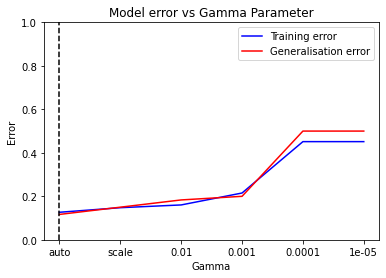

In [754]:
#### Tuning Gamma ####

gammas = ["auto","scale",1e-2, 1e-3, 1e-4, 1e-5]
clf = svm.SVC()
train_errors = list()
test_errors = list()
for gamma in gammas:
    clf.set_params(gamma = gamma)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_gamma_optim = np.argmin(test_errors)
gamma_optim = gammas[i_gamma_optim]
print("Optimal gamma : %s" % gamma_optim)

plt.plot(gammas, train_errors, c='b', label='Training error')
plt.plot(gammas, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Gamma')
plt.title('Model error vs Gamma Parameter')
plt.axvline(x=gamma_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal Cost : 10


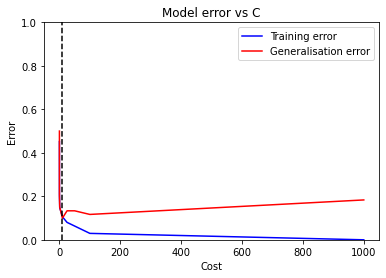

In [755]:
#### Tuning C ####

cost = [0.001, 0.10, 0.1, 1, 10, 25, 50, 100, 1000]
clf = svm.SVC()
train_errors = list()
test_errors = list()
for C in cost:
    clf.set_params(C = C)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_C_optim = np.argmin(test_errors)
C_optim = cost[i_C_optim]
print("Optimal Cost : %s" % C_optim)

plt.plot(cost, train_errors, c='b', label='Training error')
plt.plot(cost, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Cost')
plt.title('Model error vs C')
plt.axvline(x=C_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

In [756]:
svm_final = svm.SVC(kernel = kernel_optim, gamma = gamma_optim,C = C_optim, probability=True)
svm_final.fit(X_train_full_scl, y_train_full)
y_pred1 = svm_final.predict(X_test_scl)
f1_svm_final = f1_score(y_test, y_pred1, average="macro")

acc_svm_final = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_svm_final*100,2), "%")
print("F1 Score: " ,round(f1_svm_final*100,2),"%")


Accuracy:  88.33 %
F1 Score:  88.3 %


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



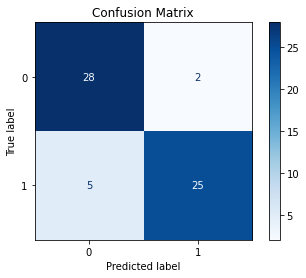

In [757]:
predicted = svm_final.predict(X_test_scl)
result(svm_final, X_test_scl, np.asarray(y_test),predicted)


##### Stratified cross validation

In [758]:
X = np.asarray(X_train_full_scl)
y = np.asarray(y_train_full)


# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
svm_accu_stratified = [] 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    svm_final.fit(x_train_fold, y_train_fold) 
    svm_accu_stratified.append(svm_final.score(x_test_fold, y_test_fold)) 


print('Maximum:',max(svm_accu_stratified))
print('Minimum:',min(svm_accu_stratified))
print('Mean:',np.mean(svm_accu_stratified))

Maximum: 0.9166666666666666
Minimum: 0.7083333333333334
Mean: 0.8097826086956521


###### ROC

In [759]:
svm_probs = svm_final.predict_proba(X_test_scl)
svm_probs = svm_probs[:, 1]  # keep probabilities for the positive outcome only
svm_auc = roc_auc_score(y_test, svm_probs) # calculate scores
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# Naïve Bayes

In [760]:
nbmod = GaussianNB()
nbmod.fit(X_train_full_scl, y_train_full)
y_pred1 = nbmod.predict(X_test_scl)
f1_nb_benchmark = f1_score(y_test, y_pred1, average="macro")

acc_nb_benchmark = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_nb_benchmark*100,2), "%")
print("F1 Score: " ,round(f1_nb_benchmark*100,2),"%")




Accuracy:  86.67 %
F1 Score:  86.65 %


##### Tuning Hyper-parameters

For Naive Bayes we do not have as many hyper-parameter to tune. We will look into the var_smoothing, ortion of the largest variance of all features that is added to variances for calculation stability.

Optimal C : 0.001


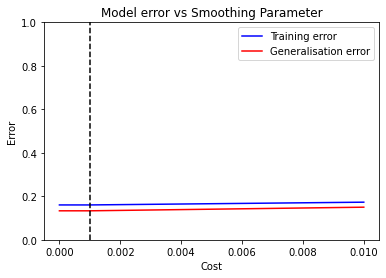

In [761]:
#### Tuning Variable Smoothing ####

var_smoothings = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2]
clf = GaussianNB()
train_errors = list()
test_errors = list()
for var_smoothing in var_smoothings:
    clf.set_params(var_smoothing = var_smoothing)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_vs_optim = np.argmin(test_errors)
vs_optim = cost[i_vs_optim]
print("Optimal C : %s" % vs_optim)

plt.plot(var_smoothings, train_errors, c='b', label='Training error')
plt.plot(var_smoothings, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Cost')
plt.title('Model error vs Smoothing Parameter')
plt.axvline(x=vs_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

In [762]:
nbmod_final = GaussianNB(var_smoothing = vs_optim)
nbmod_final.fit(X_train_full_scl, y_train_full)
y_pred1 = nbmod_final.predict(X_test_scl)
f1_nb_final = f1_score(y_test, y_pred1, average="macro")

acc_nb_final = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_nb_final*100,2), "%")
print("F1 Score: " ,round(f1_nb_final*100,2),"%")




Accuracy:  86.67 %
F1 Score:  86.65 %


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



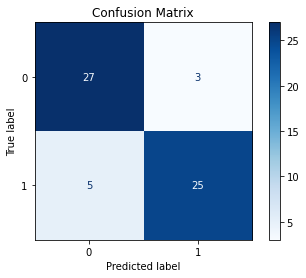

In [763]:
predicted = nbmod_final.predict(X_test_scl)
result(nbmod, X_test_scl, np.asarray(y_test),predicted)


###### Stratified Cross Validation

In [764]:
X = np.asarray(X_train_full_scl)
y = np.asarray(y_train_full)


# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
nb_accu_stratified = [] 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    nbmod.fit(x_train_fold, y_train_fold) 
    nb_accu_stratified.append(nbmod.score(x_test_fold, y_test_fold)) 


print('Maximum:',max(nb_accu_stratified))
print('Minimum:',min(nb_accu_stratified))
print('Mean:',np.mean(nb_accu_stratified))

Maximum: 0.9583333333333334
Minimum: 0.6666666666666666
Mean: 0.8181159420289855


###### ROC

In [765]:
nb_probs = nbmod.predict_proba(X_test_scl)
nb_probs = nb_probs[:, 1]  # keep probabilities for the positive outcome only
nb_auc = roc_auc_score(y_test, nb_probs) # calculate scores
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# Logistic Regression

In [766]:
logreg = LogisticRegression()
logreg.fit(X_train_full_scl, y_train_full)
y_pred1 = logreg.predict(X_test_scl)
f1_lr_benchmark = f1_score(y_test, y_pred1, average="macro")

acc_lr_benchmark = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_lr_benchmark*100,2), "%")
print("F1 Score: " ,round(f1_lr_benchmark*100,2),"%")


Accuracy:  86.67 %
F1 Score:  86.67 %


##### Tuning Hyper-parameters

Optimal C parameter with Penalty = l1 : 1 With test error: 0.1166666666666667
Optimal C parameter with Penalty = l2: 0.1 With test error: 0.1166666666666667


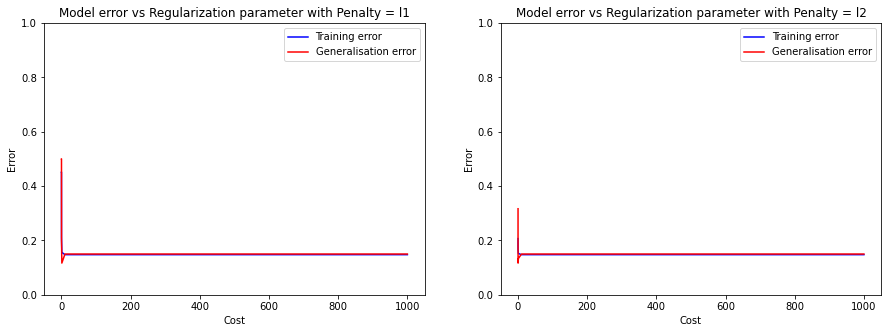

In [767]:
 #### Tuning regularization parameter for different penalty parameter ####

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_errors1 = list()
test_errors1 = list()
train_errors2 = list()
test_errors2 = list()

for C in Cs:
    clf1 = LogisticRegression(penalty = 'l1', C = C, solver='liblinear')
    clf2 = LogisticRegression(penalty = 'l2', C = C)
    clf1.set_params(C = C)
    clf2.set_params(C = C)
    clf1.fit(X_train_full_scl, y_train_full)
    clf2.fit(X_train_full_scl, y_train_full)
    train_errors1.append(1-clf1.score(X_train_full_scl, y_train_full))
    train_errors2.append(1-clf2.score(X_train_full_scl, y_train_full))
    test_errors1.append(1-clf1.score(X_test_scl, y_test))
    test_errors2.append(1-clf2.score(X_test_scl, y_test))


i_C_optim1 = np.argmin(test_errors1)
C_optim1 = cost[i_C_optim1]
print("Optimal C parameter with Penalty = l1 : %s" % C_optim1,
      "With test error:" , test_errors1[i_C_optim1])



i_C_optim2 = np.argmin(test_errors2)
C_optim2 = cost[i_C_optim2]
print("Optimal C parameter with Penalty = l2: %s" % C_optim2, 
      "With test error:" , test_errors2[i_C_optim2])

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Cs, train_errors1, c='b', label='Training error')
plt.plot(Cs, test_errors1, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Cost')
plt.title('Model error vs Regularization parameter with Penalty = l1')
plt.legend()


plt.subplot(122)
plt.plot(Cs, train_errors2, c='b', label='Training error')
plt.plot(Cs, test_errors2, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Cost')
plt.title('Model error vs Regularization parameter with Penalty = l2')
plt.legend()
plt.show()

In [768]:
logreg_final = LogisticRegression(penalty = 'l2', C = C_optim2,random_state = 0)
logreg_final.fit(X_train_full_scl, y_train_full)
y_pred1 = logreg_final.predict(X_test_scl)
f1_lr_final = f1_score(y_test, y_pred1, average="macro")

acc_lr_final = np.mean(y_pred1 == y_test)
print("Accuracy Final: " ,round(acc_lr_final*100,2), "%")
print("F1 Score Final: " ,round(f1_lr_final*100,2),"%")


Accuracy Final:  88.33 %
F1 Score Final:  88.3 %


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



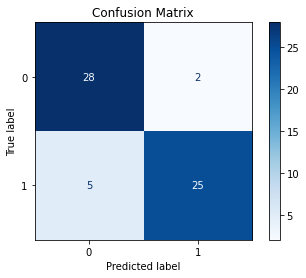

In [769]:
predicted = logreg_final.predict(X_test_scl)
result(logreg_final, X_test_scl, np.asarray(y_test),predicted)


###### Stratified Cross Validation

In [770]:
X = np.asarray(X_train_full_scl)
y = np.asarray(y_train_full)


# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lg_accu_stratified = [] 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    logreg_final.fit(x_train_fold, y_train_fold) 
    lg_accu_stratified.append(logreg_final.score(x_test_fold, y_test_fold)) 

print('Maximum:',max(lg_accu_stratified))
print('Minimum:',min(lg_accu_stratified))
print('Mean:',np.mean(lg_accu_stratified))


Maximum: 0.9583333333333334
Minimum: 0.7391304347826086
Mean: 0.8264492753623187


###### ROC

In [771]:
logreg_probs = logreg_final.predict_proba(X_test_scl)
logreg_probs = logreg_probs[:, 1]  # keep probabilities for the positive outcome only
logreg_auc = roc_auc_score(y_test, logreg_probs) # calculate scores
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Random Forest

In [772]:
rf_mod = RandomForestClassifier(random_state = 0)
rf_mod.fit(X_train_full_scl, y_train_full)
y_pred1 = rf_mod.predict(X_test_scl)
f1_rf_benchmark = f1_score(y_test, y_pred1, average="macro")

acc_rf_benchmark = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_rf_benchmark*100,2), "%")
print("F1 Score: " ,round(f1_rf_benchmark*100,2),"%")

Accuracy:  83.33 %
F1 Score:  83.33 %


Optimal number of trees : 1200


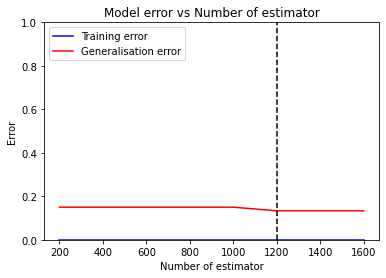

In [773]:
#### Tuning n_estimators ####

n_estimator = [200, 400, 600, 800,1000, 1200, 1400, 1600]
clf = RandomForestClassifier(random_state = 0)
train_errors = list()
test_errors = list()
for n_estimators in n_estimator:
    clf.set_params(n_estimators = n_estimators)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_n_estimator_optim = np.argmin(test_errors)
n_estimator_optim = n_estimator[i_n_estimator_optim]
print("Optimal number of trees : %s" % n_estimator_optim)

plt.plot(n_estimator, train_errors, c='b', label='Training error')
plt.plot(n_estimator, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Number of estimator')
plt.title('Model error vs Number of estimator')
plt.axvline(x=n_estimator_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal Maximum depth of the Tree : 5


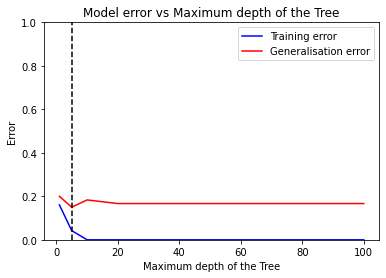

In [774]:
#### Tuning max_depth ####

max_depths = [1, 5, 10, 20, 30,50,80,100]
clf = RandomForestClassifier(random_state = 0)
train_errors = list()
test_errors = list()
for max_depth in max_depths:
    clf.set_params(max_depth = max_depth)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_max_depth_optim = np.argmin(test_errors)
max_depth_optim = max_depths[i_max_depth_optim]
print("Optimal Maximum depth of the Tree : %s" % max_depth_optim)

plt.plot(max_depths, train_errors, c='b', label='Training error')
plt.plot(max_depths, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Maximum depth of the Tree')
plt.title('Model error vs Maximum depth of the Tree')
plt.axvline(x=max_depth_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

Optimal number of features to consider when looking for the best split: : 0.2


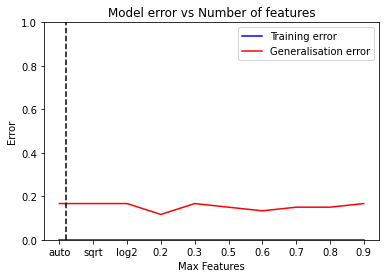

In [775]:
#### Tuning max_features ####

max_feature = ['auto','sqrt','log2', 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
clf = RandomForestClassifier(random_state = 0)
train_errors = list()
test_errors = list()
for max_features in max_feature:
    clf.set_params(max_features = max_features)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_max_features_optim = np.argmin(test_errors)
max_features_optim = max_feature[i_max_features_optim]
print("Optimal number of features to consider when looking for the best split: : %s" % max_features_optim)

plt.plot(max_feature, train_errors, c='b', label='Training error')
plt.plot(max_feature, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Max Features')
plt.title('Model error vs Number of features')
plt.axvline(x=max_features_optim, color = "black", linestyle = '--')
plt.legend()
plt.show()

In [776]:
#### Tuning Criterion ####

criterions = ['gini', 'entropy']
clf = RandomForestClassifier(random_state = 0)
train_errors = list()
test_errors = list()
for criterion in criterions:
    clf.set_params(criterion = criterion)
    clf.fit(X_train_full_scl, y_train_full)
    train_errors.append(1-clf.score(X_train_full_scl, y_train_full))
    test_errors.append(1-clf.score(X_test_scl, y_test))

i_criterion_optim = np.argmin(test_errors)
criterion_optim = criterions[i_criterion_optim]
print("Optimal number of features to consider when looking for the best split: : %s" % criterion_optim)


Optimal number of features to consider when looking for the best split: : entropy


In [777]:
rf_final = RandomForestClassifier(criterion = criterion_optim, n_estimators = n_estimator_optim, max_depth = max_depth_optim, max_features =max_features_optim )
rf_final.fit(X_train_full_scl, y_train_full)
y_pred1 = rf_final.predict(X_test_scl)
f1_rf_final = f1_score(y_test, y_pred1, average="macro")

acc_rf_final = np.mean(y_pred1 == y_test)
print("Accuracy: " ,round(acc_rf_final*100,2), "%")
print("F1 Score: " ,round(f1_rf_final*100,2),"%")



Accuracy:  86.67 %
F1 Score:  86.65 %


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



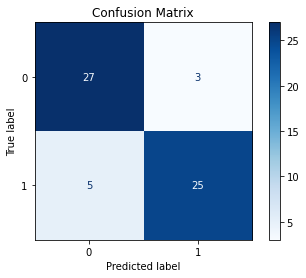

In [778]:
predicted = rf_final.predict(X_test_scl)
result(rf_final, X_test_scl, np.asarray(y_test),predicted)


##### Stratified Cross Validation

In [779]:
X = np.asarray(X_train_full_scl)
y = np.asarray(y_train_full)


# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
rf_accu_stratified = [] 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    rf_final.fit(x_train_fold, y_train_fold) 
    rf_accu_stratified.append(rf_final.score(x_test_fold, y_test_fold)) 

print('Maximum:',max(rf_accu_stratified))
print('Minimum:',min(rf_accu_stratified))
print('Mean:',np.mean(rf_accu_stratified))

Maximum: 0.9166666666666666
Minimum: 0.7391304347826086
Mean: 0.8177536231884058


###### ROC

In [780]:
rf_probs = rf_final.predict_proba(X_test_scl)
rf_probs = rf_probs[:, 1]  # keep probabilities for the positive outcome only
rf_auc = roc_auc_score(y_test, rf_probs) # calculate scores
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

## Result

In [781]:
mod = ["KNN", "Naive Bayes","Support Vector Machine","Logistic Regression","Random Forest"]
acc = {
'Accuracy_benchmark' : [acc_knn_benchmark,acc_nb_benchmark,acc_svm_benchmark,
                      acc_lr_benchmark,acc_rf_benchmark],

'Accuracy_final' : [acc_knn_final,acc_nb_final,acc_svm_final,
                      acc_lr_final,acc_rf_final]}
f1 = {

'F1_benchmark' : [acc_knn_benchmark,acc_nb_benchmark,acc_svm_benchmark,
                      acc_lr_benchmark,acc_rf_benchmark],

'F1_final' : [acc_knn_final,acc_nb_final,acc_svm_final,
                      acc_lr_final,acc_rf_final]
}

models_acc = pd.DataFrame(acc, index = mod)


models_f1 = pd.DataFrame(f1, index = mod)




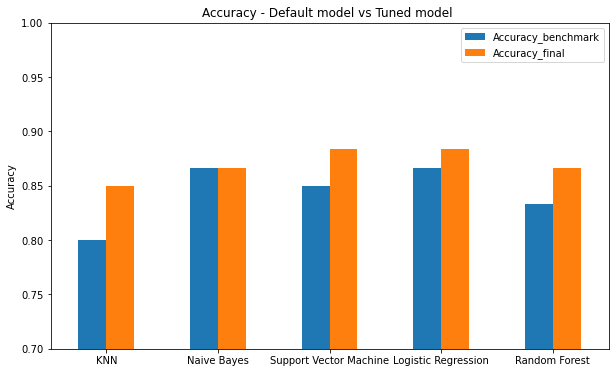

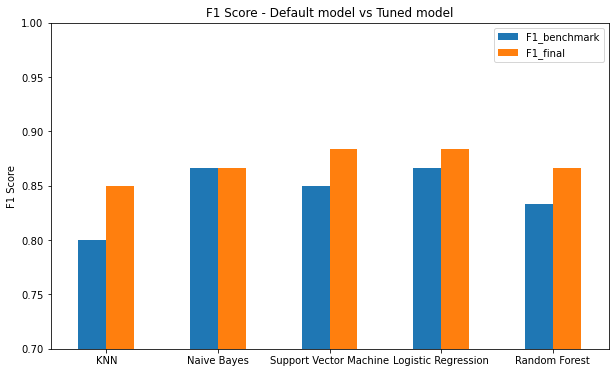

In [782]:
models_acc.plot(kind="bar", figsize=(10, 6))
plt.title("Accuracy - Default model vs Tuned model ")
plt.ylabel("Accuracy")
plt.ylim(0.7,1)
plt.xticks(rotation = 0)
plt.show()

models_f1.plot(kind="bar", figsize=(10, 6))
plt.title("F1 Score - Default model vs Tuned model")
plt.ylabel("F1 Score")
plt.ylim(0.7,1)
plt.xticks(rotation = 0)
plt.show()

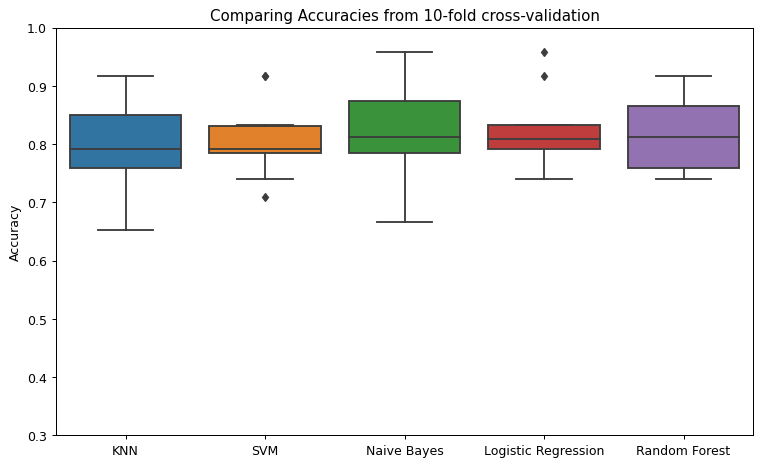

In [783]:
cv_results = {"knn":knn_accu_stratified,
              "svm":svm_accu_stratified,
              "nb":nb_accu_stratified,
              "lg":lg_accu_stratified,
              "rf":rf_accu_stratified}
models_results = pd.DataFrame(cv_results)
fig = plt.subplots(figsize=(10, 6), dpi=90)


sns.boxplot(data = models_results)
plt.xticks(plt.xticks()[0],["KNN","SVM","Naive Bayes", "Logistic Regression","Random Forest"])
plt.ylim(0.3,1)
plt.ylabel("Accuracy")
plt.title("Comparing Accuracies from 10-fold cross-validation")
plt.show()

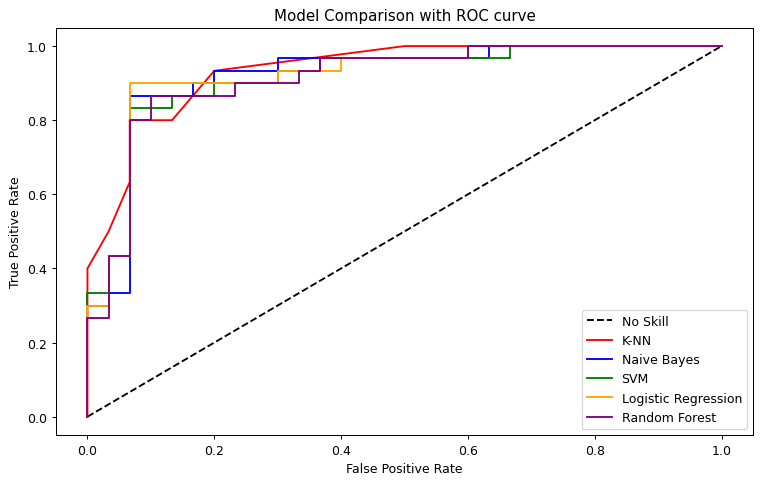

In [784]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)



# plot the roc curve for the model
fig = plt.subplots(figsize=(10, 6), dpi=90)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color = "black")
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='K-NN', color = "red")
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Naive Bayes', color = "blue")
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM', color = "green")
plt.plot(logreg_fpr, logreg_tpr, linestyle='-', label='Logistic Regression', color = "orange")
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest', color = "purple")
# Title
plt.title('Model Comparison with ROC curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [785]:
print("Calculate one-sided paired t-test for different models \n")

KvN = stats.ttest_rel(knn_accu_stratified,nb_accu_stratified)
KvS = stats.ttest_rel(knn_accu_stratified,svm_accu_stratified)
KvL = stats.ttest_rel(knn_accu_stratified,lg_accu_stratified)
KvR = stats.ttest_rel(knn_accu_stratified,rf_accu_stratified)
NvS = stats.ttest_rel(nb_accu_stratified,svm_accu_stratified)
NvL = stats.ttest_rel(nb_accu_stratified,lg_accu_stratified)
NvR = stats.ttest_rel(nb_accu_stratified,rf_accu_stratified)
SvL = stats.ttest_rel(svm_accu_stratified,lg_accu_stratified)
SvR = stats.ttest_rel(svm_accu_stratified,rf_accu_stratified)
LvR = stats.ttest_rel(lg_accu_stratified,rf_accu_stratified)
data = {'pvalue' : [KvN[1], KvS[1],KvL[1],KvR[1], NvS[1],NvL[1],NvR[1],SvL[1],SvR[1],LvR[1]],
        'tstat' : [KvN[0], KvS[0],KvL[0],KvR[0], NvS[0],NvL[0],NvR[0],SvL[0],SvR[0],LvR[0]],
        'H1' : ["KNN < Naive Bayes","KNN < SVM","KNN < Logistic Regression", "KNN < Random Forest",
       "Naive Bayes < SVM", "Naive Bayes < Logistic Regression", "Naive Bayes < Random Forest",
       "SVM < Logistic Regression","SVM < Random Forest","Logistic Regression < Random Forest"],
       'H0' : ["KNN = Naive Bayes","KNN = SVM","KNN = Logistic Regression", "KNN = Random Forest",
       "Naive Bayes = SVM", "Naive Bayes = Logistic Regression", "Naive Bayes = Random Forest",
       "SVM = Logistic Regression","SVM = Random Forest","Logistic Regression  Random Forest"]

}
stat_test = pd.DataFrame(data, columns = ['H0','H1','pvalue','tstat'], index=None)


stat_test






Calculate one-sided paired t-test for different models 



,H0,H1,pvalue,tstat
0,KNN = Naive Bayes,KNN < Naive Bayes,0.446990,-0.795146
1,KNN = SVM,KNN < SVM,0.228403,-1.292429
2,KNN = Logistic Regression,KNN < Logistic Regression,0.038857,-2.416128
3,KNN = Random Forest,KNN < Random Forest,0.392625,-0.897900
4,Naive Bayes = SVM,Naive Bayes < SVM,0.714213,0.377970
5,Naive Bayes = Logistic Regression,Naive Bayes < Logistic Regression,0.749466,-0.329297
6,Naive Bayes = Random Forest,Naive Bayes < Random Forest,0.990445,0.012313
7,SVM = Logistic Regression,SVM < Logistic Regression,0.103888,-1.809068
8,SVM = Random Forest,SVM < Random Forest,0.694279,-0.405925
9,Logistic Regression Random Forest,Logistic Regression < Random Forest,0.608497,0.530661


## Hungarian Data Preparation

In [786]:

##############

h_data.num = pd.Series(np.where(h_data.num.values == 0, 0, 1), h_data.index)
s_data.num = pd.Series(np.where(s_data.num.values == 0, 0, 1), s_data.index)
v_data.num = pd.Series(np.where(v_data.num.values == 0, 0, 1), v_data.index)

test_scl_h = h_data.copy()
test_scl_s = s_data.copy()
test_scl_v = v_data.copy()

sc = StandardScaler()
X_train_full_scl = X_train_full.copy()
X_train_full_scl[continous_val] = sc.fit_transform(X_train_full[continous_val])

test_scl_h[continous_val] = sc.transform(h_data[continous_val])
test_scl_s[continous_val] = sc.transform(s_data[continous_val])
test_scl_v[continous_val] = sc.transform(v_data[continous_val])


# ############

X_test_h = test_scl_h.drop(columns=['num'])
y_test_h = test_scl_h['num']

X_test_s = test_scl_s.drop(columns=['num'])
y_test_s = test_scl_s['num']

X_test_v = test_scl_v.drop(columns=['num'])
y_test_v = test_scl_v['num']



# ############

# X_train_c = X_train_c.drop(columns=['Age','fbs','thalach'])
X_test_h = X_test_h.drop(columns=['fbs'])
X_test_s = X_test_s.drop(columns=['fbs'])
X_test_v = X_test_v.drop(columns=['fbs'])


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Testing KNN model 

Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.80       181
           1       0.83      0.15      0.25       103

    accuracy                           0.68       284
   macro avg       0.75      0.56      0.52       284
weighted avg       0.73      0.68      0.60       284



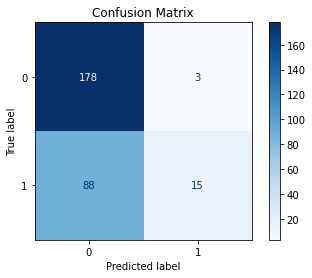

0.6795774647887324

In [787]:

predicted = knn_final.predict(X_test_h)
result(knn_final, X_test_h, np.asarray(y_test_h),predicted)
np.mean(predicted==y_test_h)

Classification report : 
               precision    recall  f1-score   support

           0       0.09      0.88      0.17         8
           1       0.98      0.37      0.54       108

    accuracy                           0.41       116
   macro avg       0.53      0.62      0.35       116
weighted avg       0.91      0.41      0.51       116



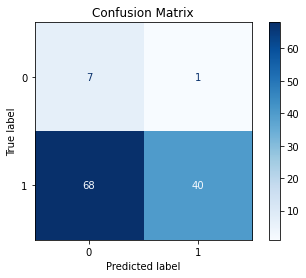

0.4051724137931034

In [788]:
predicted = knn_final.predict(X_test_s)
result(knn_final, X_test_s, np.asarray(y_test_s),predicted)
np.mean(predicted==y_test_s)

Classification report : 
               precision    recall  f1-score   support

           0       0.28      0.71      0.40        49
           1       0.76      0.33      0.46       137

    accuracy                           0.43       186
   macro avg       0.52      0.52      0.43       186
weighted avg       0.63      0.43      0.44       186



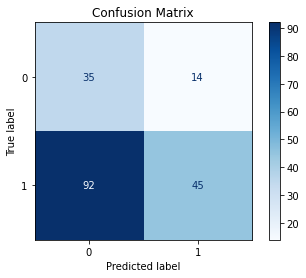

0.43010752688172044

In [789]:
predicted = knn_final.predict(X_test_v)
result(knn_final, X_test_v, np.asarray(y_test_v),predicted)
np.mean(predicted==y_test_v)

## Testing Naive Bayes 

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       181
           1       0.87      0.46      0.60       103

    accuracy                           0.78       284
   macro avg       0.81      0.71      0.72       284
weighted avg       0.80      0.78      0.76       284



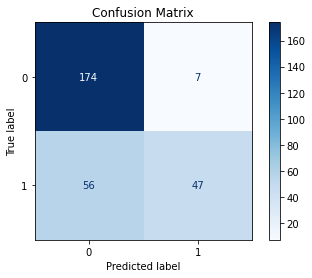

0.778169014084507

In [790]:
predicted = nbmod_final.predict(X_test_h)
result(nbmod_final, X_test_h, np.asarray(y_test_h),predicted)
np.mean(predicted==y_test_h)

Classification report : 
               precision    recall  f1-score   support

           0       0.09      0.75      0.16         8
           1       0.96      0.42      0.58       108

    accuracy                           0.44       116
   macro avg       0.52      0.58      0.37       116
weighted avg       0.90      0.44      0.55       116



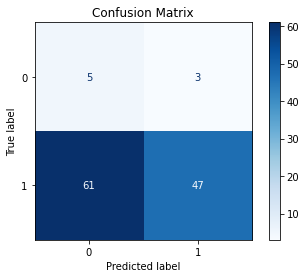

0.4396551724137931

In [791]:
predicted = nbmod_final.predict(X_test_s)
result(nbmod, X_test_s, np.asarray(y_test_s),predicted)
np.mean(predicted==y_test_s)

Classification report : 
               precision    recall  f1-score   support

           0       0.33      0.47      0.39        49
           1       0.78      0.66      0.72       137

    accuracy                           0.61       186
   macro avg       0.56      0.57      0.55       186
weighted avg       0.66      0.61      0.63       186



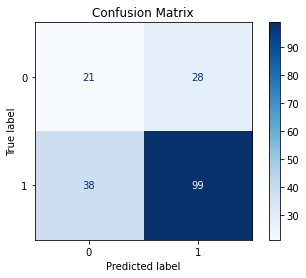

0.6129032258064516

In [792]:
predicted = nbmod_final.predict(X_test_v)
result(nbmod, X_test_v, np.asarray(y_test_v),predicted)
np.mean(predicted==y_test_v)

## Testing SVM Final model

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.98      0.83       181
           1       0.91      0.31      0.46       103

    accuracy                           0.74       284
   macro avg       0.81      0.65      0.65       284
weighted avg       0.79      0.74      0.70       284



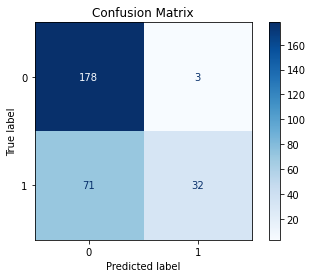

0.7394366197183099

In [793]:
predicted = svm_final.predict(X_test_h)
result(svm_final, X_test_h, np.asarray(y_test_h),predicted)
np.mean(predicted==y_test_h)

Classification report : 
               precision    recall  f1-score   support

           0       0.08      0.88      0.15         8
           1       0.96      0.25      0.40       108

    accuracy                           0.29       116
   macro avg       0.52      0.56      0.27       116
weighted avg       0.90      0.29      0.38       116



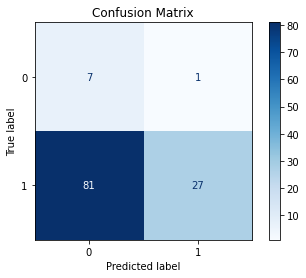

0.29310344827586204

In [794]:
predicted = svm_final.predict(X_test_s)
result(svm_final, X_test_s, np.asarray(y_test_s),predicted)
np.mean(predicted==y_test_s)

Classification report : 
               precision    recall  f1-score   support

           0       0.28      0.55      0.37        49
           1       0.75      0.49      0.59       137

    accuracy                           0.51       186
   macro avg       0.52      0.52      0.48       186
weighted avg       0.63      0.51      0.53       186



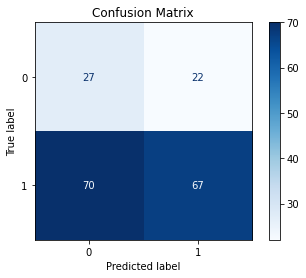

0.5053763440860215

In [795]:
predicted = svm_final.predict(X_test_v)
result(svm_final, X_test_v, np.asarray(y_test_v),predicted)
np.mean(predicted==y_test_v)

## Testing Logistic repression


Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       181
           1       0.82      0.14      0.23       103

    accuracy                           0.68       284
   macro avg       0.75      0.56      0.51       284
weighted avg       0.72      0.68      0.59       284



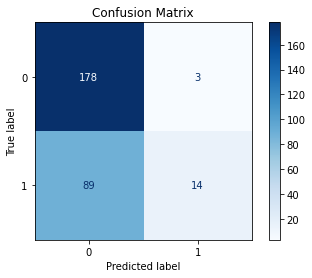

0.676056338028169

In [796]:
predicted = logreg_final.predict(X_test_h)
result(logreg_final, X_test_h, np.asarray(y_test_h),predicted)
np.mean(predicted==y_test_h)

Classification report : 
               precision    recall  f1-score   support

           0       0.09      0.88      0.16         8
           1       0.97      0.31      0.46       108

    accuracy                           0.34       116
   macro avg       0.53      0.59      0.31       116
weighted avg       0.91      0.34      0.44       116



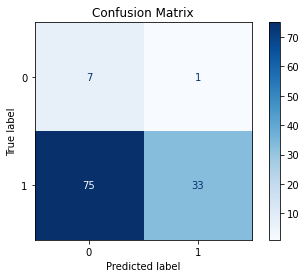

0.3448275862068966

In [797]:
predicted = logreg_final.predict(X_test_s)
result(logreg_final, X_test_s, np.asarray(y_test_s),predicted)
np.mean(predicted==y_test_s)

Classification report : 
               precision    recall  f1-score   support

           0       0.26      0.55      0.35        49
           1       0.73      0.43      0.54       137

    accuracy                           0.46       186
   macro avg       0.49      0.49      0.45       186
weighted avg       0.60      0.46      0.49       186



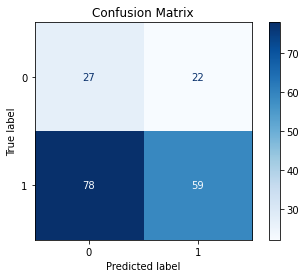

0.46236559139784944

In [798]:
predicted = logreg_final.predict(X_test_v)
result(logreg_final, X_test_v, np.asarray(y_test_v),predicted)
np.mean(predicted==y_test_v)

## Testing Random Forest

Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       181
           1       0.88      0.50      0.64       103

    accuracy                           0.80       284
   macro avg       0.83      0.73      0.75       284
weighted avg       0.81      0.80      0.78       284



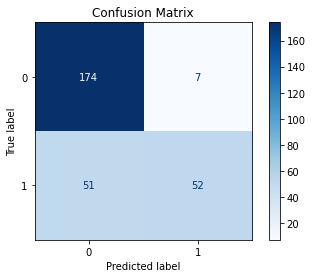

0.795774647887324

In [799]:
predicted = rf_final.predict(X_test_h)
result(rf_final, X_test_h, np.asarray(y_test_h),predicted)
np.mean(predicted==y_test_h)

Classification report : 
               precision    recall  f1-score   support

           0       0.08      0.75      0.15         8
           1       0.96      0.40      0.56       108

    accuracy                           0.42       116
   macro avg       0.52      0.57      0.36       116
weighted avg       0.90      0.42      0.53       116



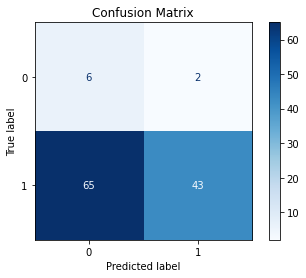

0.4224137931034483

In [800]:
predicted = rf_final.predict(X_test_s)
result(rf_final, X_test_s, np.asarray(y_test_s),predicted)
np.mean(predicted==y_test_s)

Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.84      0.52        49
           1       0.90      0.50      0.64       137

    accuracy                           0.59       186
   macro avg       0.64      0.67      0.58       186
weighted avg       0.76      0.59      0.61       186



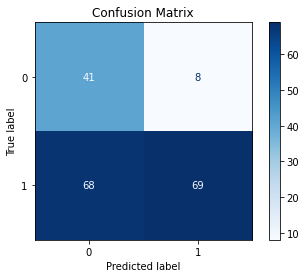

0.5913978494623656

In [801]:
predicted = rf_final.predict(X_test_v)
result(rf_final, X_test_v, np.asarray(y_test_v),predicted)
np.mean(predicted==y_test_v)

In [802]:
mod = ['KNN', 'NaiveBayes', 'SVM', 'LogisticRegression','RandomForest']


data = {'Hungarian Data' : [0.68,0.79,0.74,0.68,0.75],
        'Switzerland Data' : [0.41,0.45,0.29,0.34,0.43],
        'Long Beach VA Data' : [0.43,0.65,0.51,0.46,0.49] }

dt = pd.DataFrame (data, columns = ['Hungarian Data','Switzerland Data','Long Beach VA Data'], index = mod)
dt

,Hungarian Data,Switzerland Data,Long Beach VA Data
KNN,0.68,0.41,0.43
NaiveBayes,0.79,0.45,0.65
SVM,0.74,0.29,0.51
LogisticRegression,0.68,0.34,0.46
RandomForest,0.75,0.43,0.49


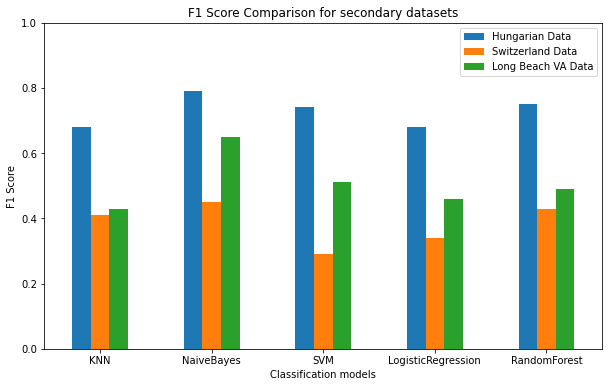

In [803]:
dt.plot(kind="bar", figsize=(10, 6))
plt.title("F1 Score Comparison for secondary datasets")
plt.xlabel("Classification models")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.xticks(rotation = 0)
plt.show()